In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

#### pivot_table
透视表就是和groupby差不多的功能

In [4]:
tip = sns.load_dataset('tips')

In [5]:
tip

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


- index表示分类的种类
- value表示需要选取的属性
- aggfunc表示对分组内的数值的操作

In [13]:
pd.pivot_table(tip, index=['sex'], values=['size'], aggfunc=[np.max])

,amax
,size
sex,
Male,6
Female,6


#### pd.merge

In [14]:
def entropy(class1, class2):
    p1 = (class1/(class1+class2))
    p2 = (class2/(class1+class2))
    return -(p1*np.log2(p1) + p2*np.log2(p2))


np.log2(10)

entropy(5, 9)

0.9402859586706311

In [15]:
df1 = pd.DataFrame(np.random.random(20).reshape((10, 2)), columns=list('AB'))
df1

,A,B
0,0.450073,0.677415
1,0.223363,0.732161
2,0.826118,0.211952
3,0.867871,0.718140
4,0.312154,0.273487
5,0.262970,0.700996
6,0.047599,0.306127
7,0.042794,0.251824
8,0.120769,0.210285
9,0.446166,0.654446


In [20]:
df1[df1['A'] < 0.5].B = 1

E:\anaconda\lib\site-packages\pandas\core\generic.py:5507: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [21]:
df1

,A,B
0,0.450073,0.677415
1,0.223363,0.732161
2,0.826118,0.211952
3,0.867871,0.718140
4,0.312154,0.273487
5,0.262970,0.700996
6,0.047599,0.306127
7,0.042794,0.251824
8,0.120769,0.210285
9,0.446166,0.654446


In [22]:
df1.loc[:, 'B'] = 1

In [23]:
df1

,A,B
0,0.450073,1
1,0.223363,1
2,0.826118,1
3,0.867871,1
4,0.312154,1
5,0.262970,1
6,0.047599,1
7,0.042794,1
8,0.120769,1
9,0.446166,1


x_train1 = torch.Tensor(x_train)
y_train1 = torch.Tensor(y_train.values)

class net(nn.Module):
    def __init__(self):
        super(net, self).__init__()
        self.main = nn.Sequential(nn.Linear(54, 100), 
                           nn.ReLU(),
                           nn.Linear(100, 100),
                           nn.Linear(100, 1))
    def forward(self, x):
        return self.main(x)

net1 = net()

loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net1.parameters())

for epoch in range(10):
    out = net1(x_train1)
    loss = loss_func(out, y_train1)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

## 字典排序

In [1]:
a = dict()

In [2]:
a['a'] = 25
a['b'] = 22
a['c'] = 31
a['d'] = 21

In [5]:
sorted_a = sorted(a.items(), key=lambda x: x[1])
sorted_a

[('d', 21), ('b', 22), ('a', 25), ('c', 31)]

In [6]:
dict(sorted_a)

{'d': 21, 'b': 22, 'a': 25, 'c': 31}

### 一阶差分

In [3]:
a = pd.Series([1, 2, 3, 2, 4, 2])

In [8]:
diff1 = a.diff(1)
diff1

0    NaN
1    1.0
2    1.0
3   -1.0
4    2.0
5   -2.0
dtype: float64

In [9]:
diff2 = diff1.diff(1)
diff2

0    NaN
1    NaN
2    0.0
3   -2.0
4    3.0
5   -4.0
dtype: float64

## lstm

In [22]:
from tensorflow import keras 
import numpy
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pylab as plt
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
flight = sns.load_dataset('flights').passengers.values.reshape(-1, 1)
flight[:5]

array([[112],
       [118],
       [132],
       [129],
       [121]], dtype=int64)

In [3]:
scaler = MinMaxScaler()
flight1 = scaler.fit_transform(flight)

In [4]:
train_size = int(len(flight) * 0.6)
train = flight1[:train_size]
test = flight1[train_size:]

def create_dataset(dataset, look_back):
    # 这里的look_back与timestep相同
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [5]:
x_train, y_train = create_dataset(train, 2)
x_test, y_test = create_dataset(test, 2)

In [6]:
x_train = numpy.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = numpy.reshape(x_test, (x_test.shape[0], x_test.shape[1] ,1 ))

In [7]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=2)
# model.save(os.path.join("DATA","Test" + ".h5"))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
83/83 - 0s - loss: 0.0625
Epoch 2/100
83/83 - 0s - loss: 0.0264
Epoch 3/100
83/83 - 0s - loss: 0.0198
Epoch 4/100
83/83 - 0s - loss: 0.0183
Epoch 5/100
83/83 - 0s - loss: 0.0167
Epoch 6/100
83/83 - 0s - loss: 0.0157
Epoch 7/100
83/83 - 0s - loss: 0.0144
Epoch 8/100
83/83 - 0s - loss: 0.0135
Epoch 9/100
83/83 - 0s - loss: 0.0125
Epoch 10/100
83/83 - 0s - loss: 0.0117
Epoch 11/100
83/83 - 0s - loss: 0.0108
Epoch 12/100
83/83 - 0s - loss: 0.0098
Epoch 13/100
83/83 - 0s - loss: 0.0088
Epoch 14/100
83/83 - 0s - loss: 0.0079
Epoch 15/100
83/83 - 0s - loss: 0.0070
Epoch 16/100
83/83 - 0s - loss: 0.0060
Epoch 17/100
83/83 - 0s - loss: 0.0050
Epoch 18/100
83/83 - 0s - loss: 0.0043
Epoch 19/100
83/83 - 0s - loss: 0.0036
Epoch 20/100
83/83 - 0s - loss: 0.0032
Epoch 21/100
83/8

In [8]:
train_pred = model.predict(x_train)
train_pred = scaler.inverse_transform(train_pred)
y_train = scaler.inverse_transform(y_train)

In [9]:
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

In [20]:
scaler.inverse_transform(test)[:3]

array([[317.],
       [313.],
       [318.]])

In [17]:
scaler.inverse_transform(x_test.squeeze())[:3], y_test[:3]

(array([[317., 313.],
        [313., 318.],
        [318., 374.]]),
 array([[318.],
        [374.],
        [413.]]))

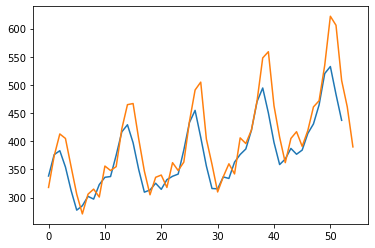

In [21]:
plt.plot(y_pred[2:])
plt.plot(y_test)

In [23]:
r2_score(y_test, y_pred)

0.4420271812407476

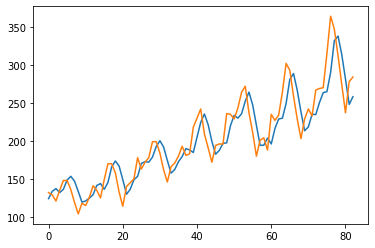

In [11]:
plt.plot(train_pred)
plt.plot(y_train)